In [1]:
import  warnings
warnings.filterwarnings('ignore')

# 1: Import Libraries and Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head(5)
# label  -->  y

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

# 2: Exploratory Data Analysis (EDA)

## Features:
#### 1) Age (numeric)
#### 2) Job : type of job (categorical: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, ‘unknown’)
#### 3) Marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’ ; note: ‘divorced’ means divorced or widowed)
#### 4) Education (categorical: ‘basic.4y’, ‘basic.6y’, ‘basic.9y’, ‘high.school’, ‘illiterate’, ‘professional.course’, ‘university.degree’, ‘unknown’)
#### 5) Default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)
#### 6) Housing: has housing loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
#### 7) Loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
#### 8) Contact: contact communication type (categorical: ‘cellular’,‘telephone’)
#### 9) Month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
#### 10) Day_of_week: last contact day of the week (categorical: ‘mon’,‘tue’,‘wed’,‘thu’,‘fri’)
#### 11) Duration: last contact duration, in seconds (numeric).
#### 12) Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#### 13) Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#### 14) Previous: number of contacts performed before this campaign and for this client (numeric)
#### 15) Poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)
#### 16) Emp.var.rate: employment variation rate - quarterly indicator (numeric)
#### 17) Cons.price.idx: consumer price index - monthly indicator (numeric)
#### 18) Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
#### 19) Euribor3m: euribor 3 month rate - daily indicator (numeric)
#### 20) Nr.employed: number of employees - quarterly indicator (numeric) Output variable (desired target):
#### 21) y: has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Checking out the categories and their respective counts in each feature
print("Job:",df.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Dealing with Missing Values

In [8]:
df.replace('unknown', np.NaN, inplace=True)

In [9]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [10]:
df.dropna(inplace=True)

#### study 'default'

In [11]:
df.default.value_counts()

no     30485
yes        3
Name: default, dtype: int64

In [12]:
df.drop("default",axis=1,inplace=True)

#### study 'pdays'
There is also a issue in pdays feature. if the value is 999, then it will be replaced with a 0 which means that the client was not previously contacted.

In [13]:
df.pdays.value_counts()

999    29178
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: pdays, dtype: int64

In [14]:
df.loc[df['pdays'] == 999, 'pdays'] = 0

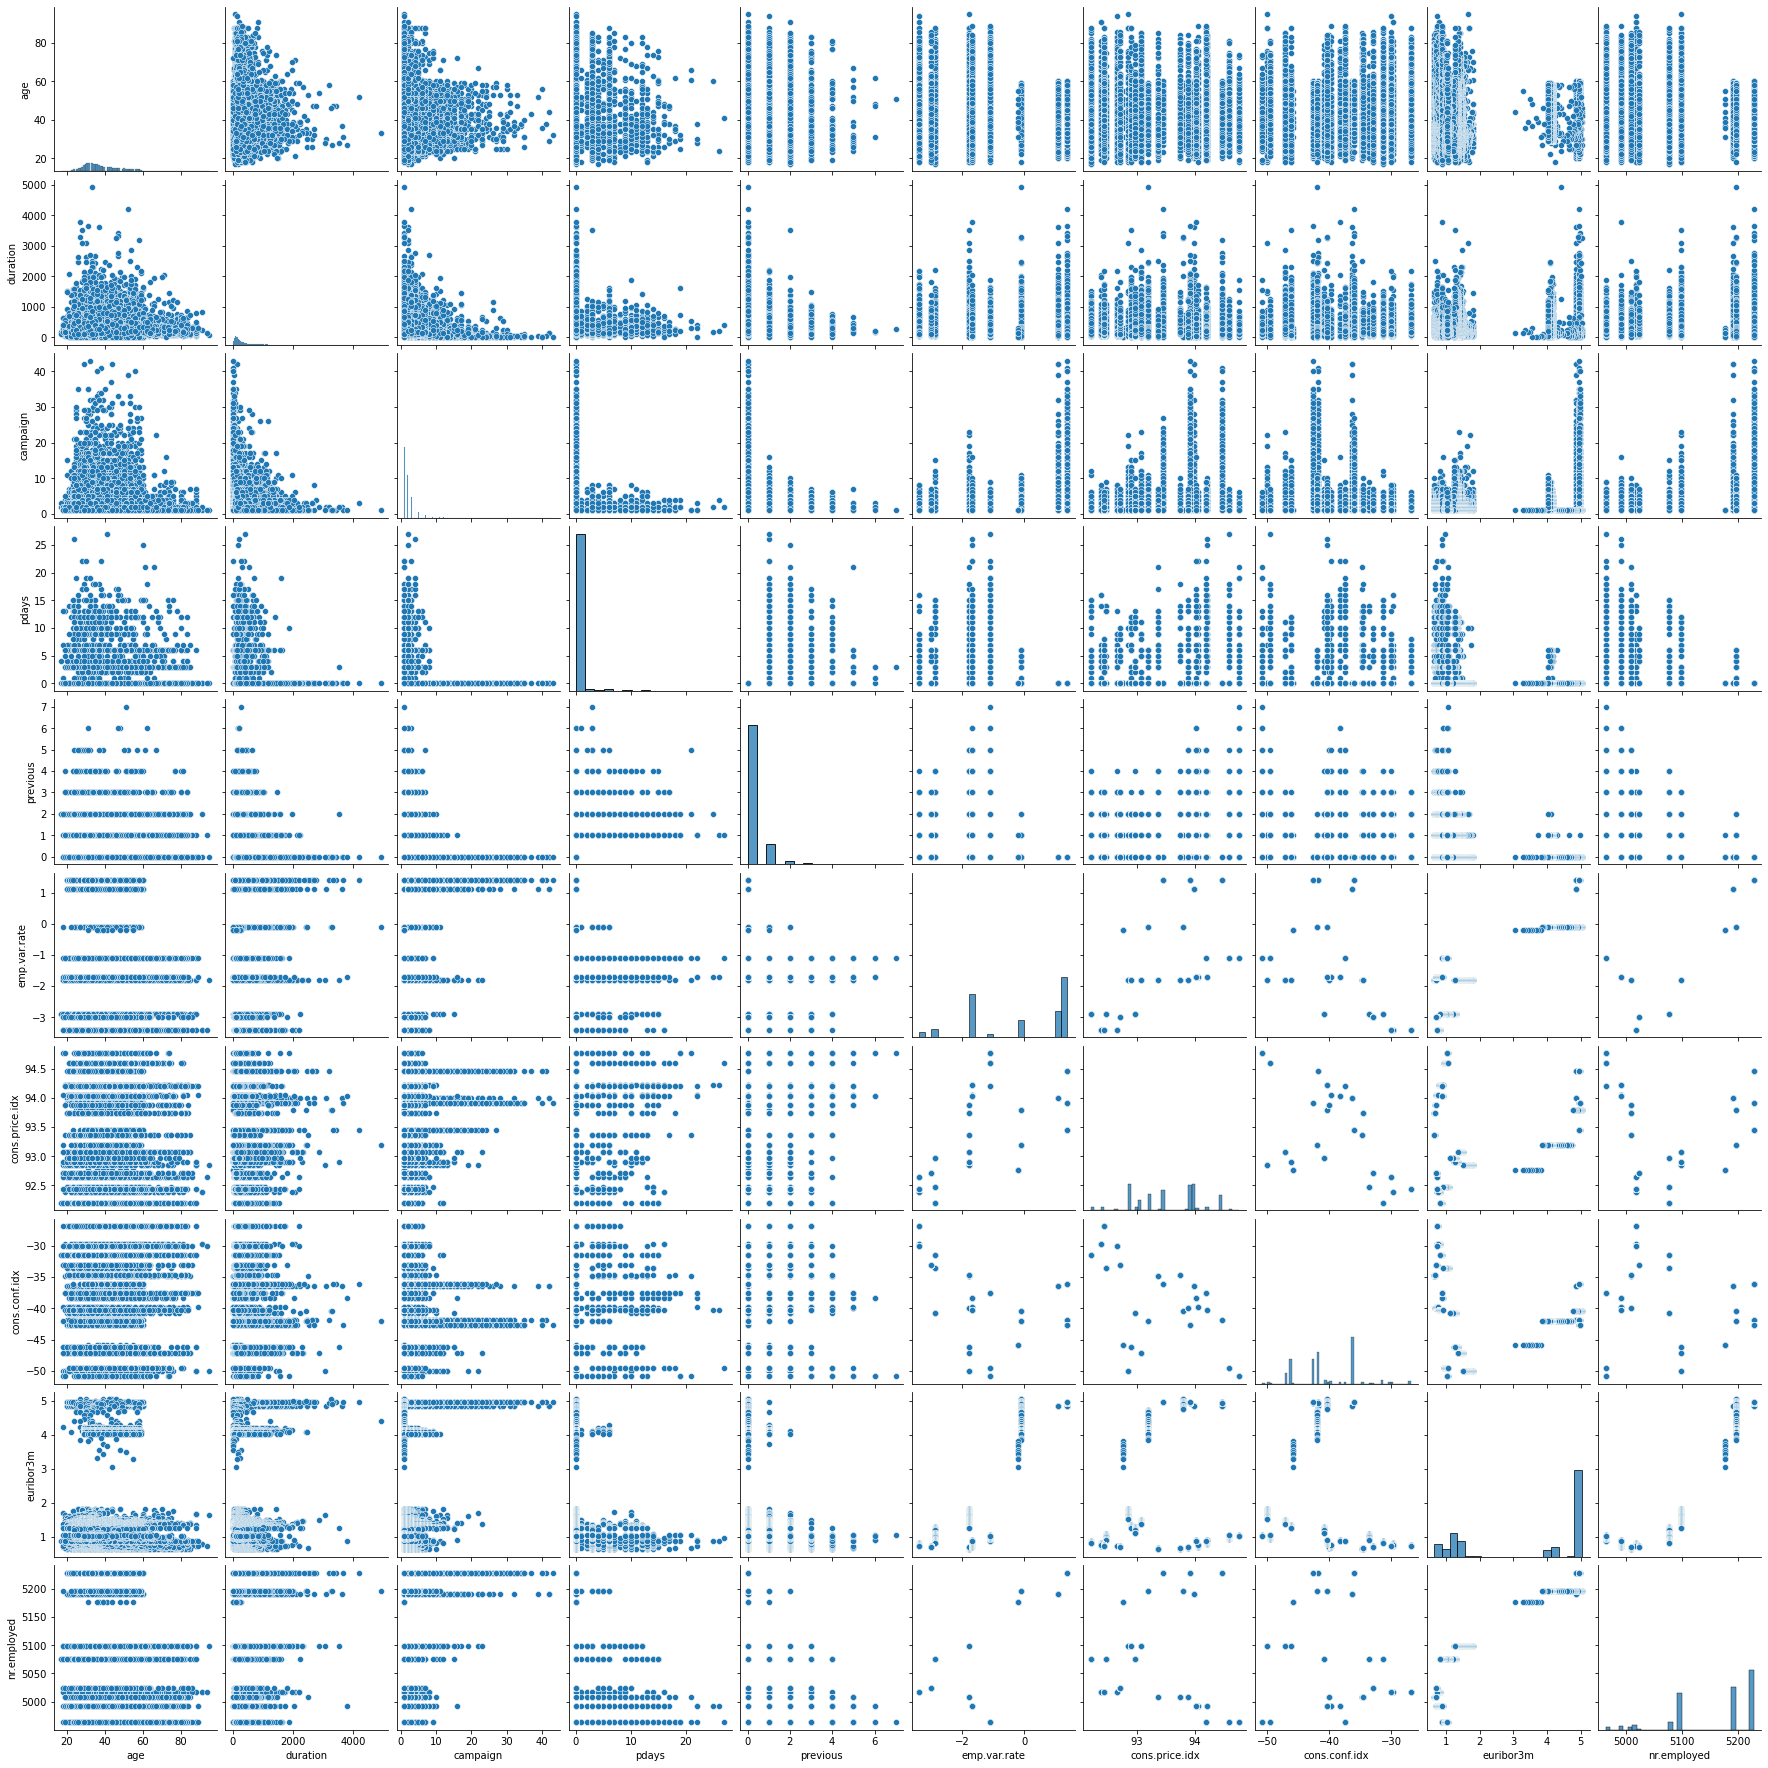

In [15]:
sns.pairplot(df)

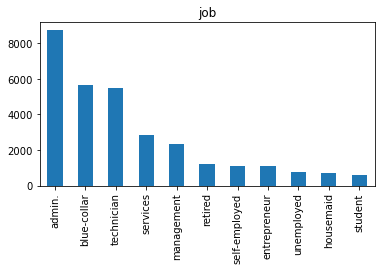

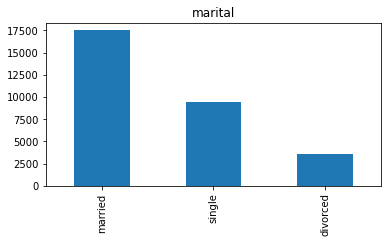

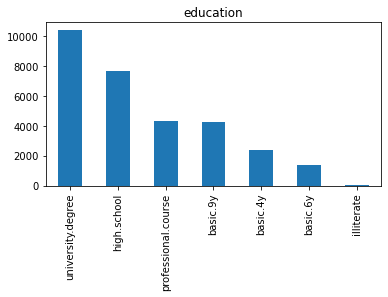

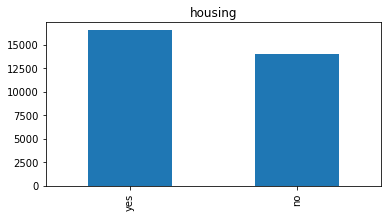

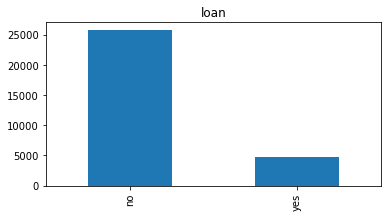

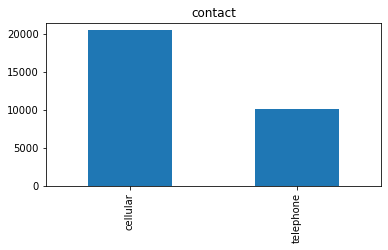

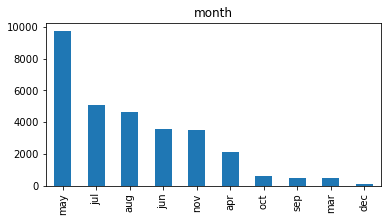

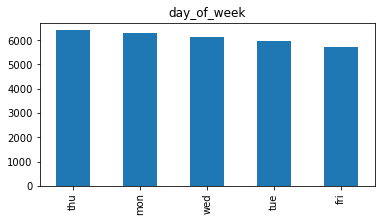

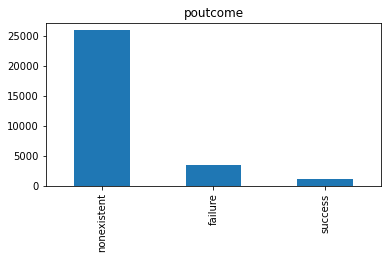

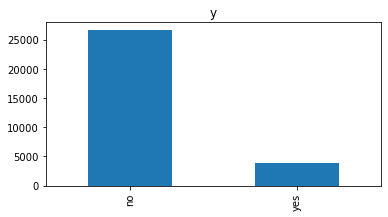

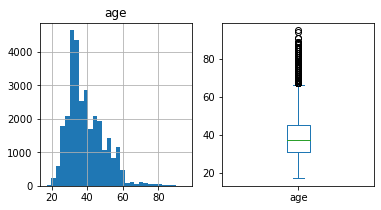

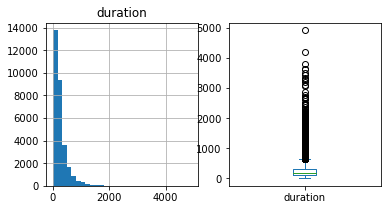

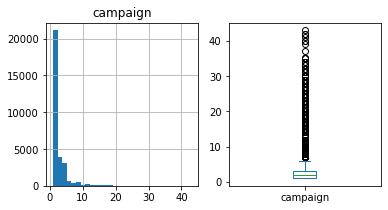

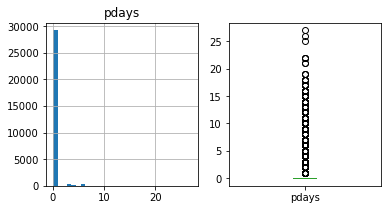

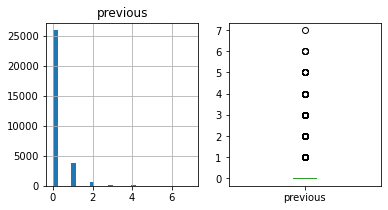

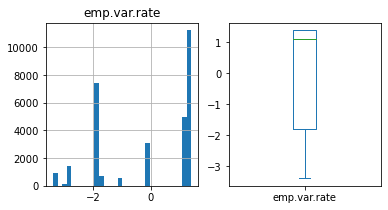

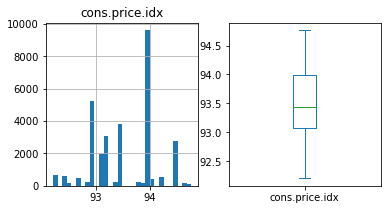

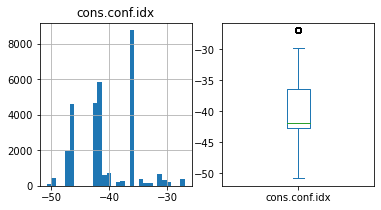

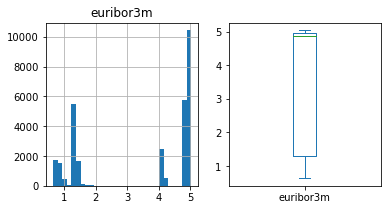

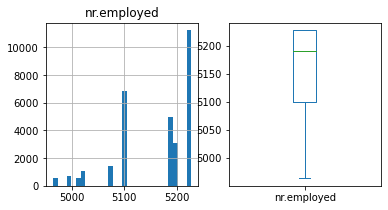

In [16]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Plot histograms for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

# Plot histograms + box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(col)
    
    # Box plot
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')
    
    plt.show()

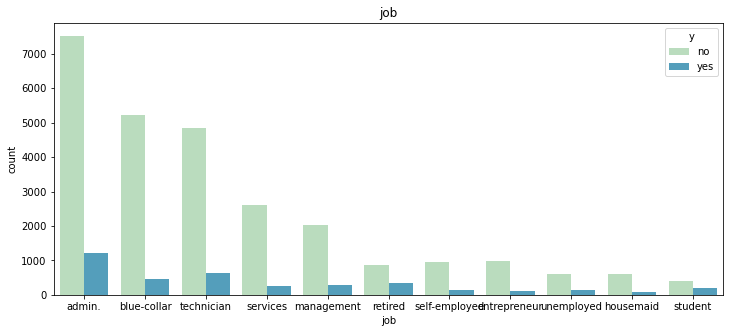

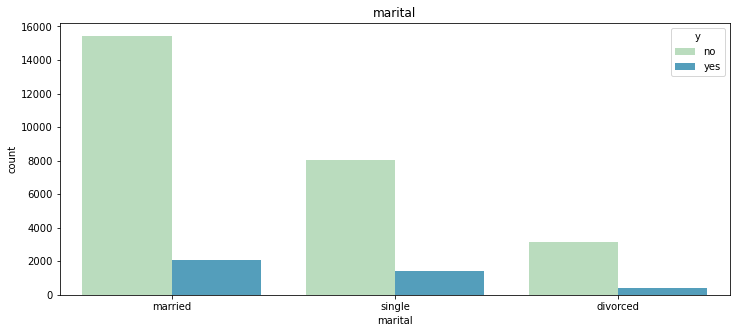

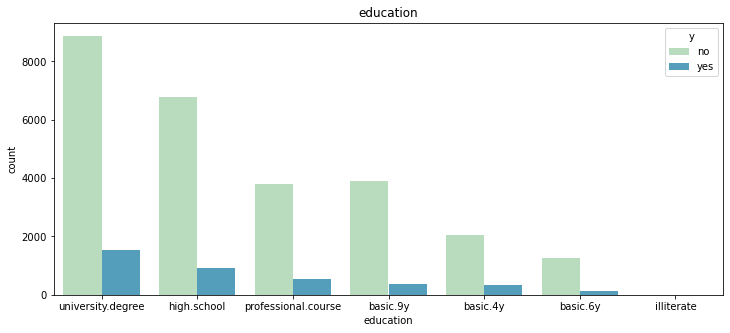

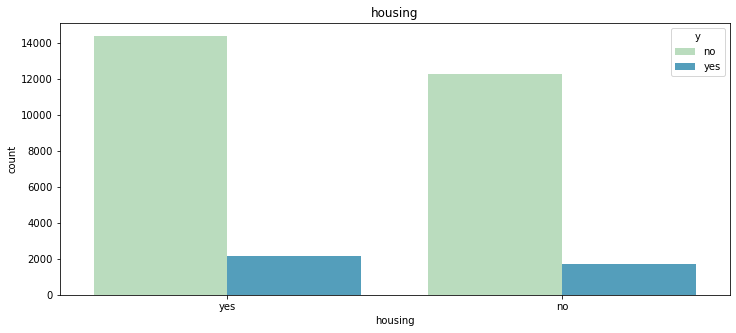

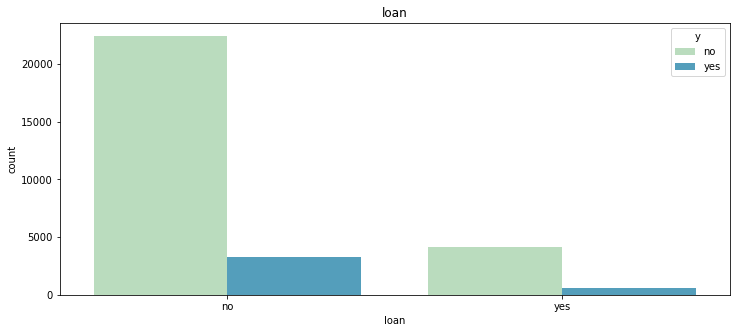

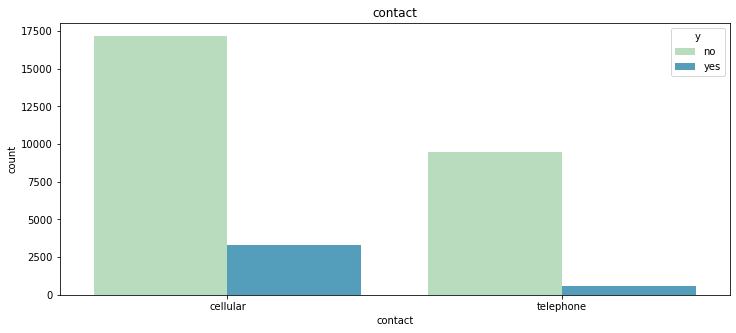

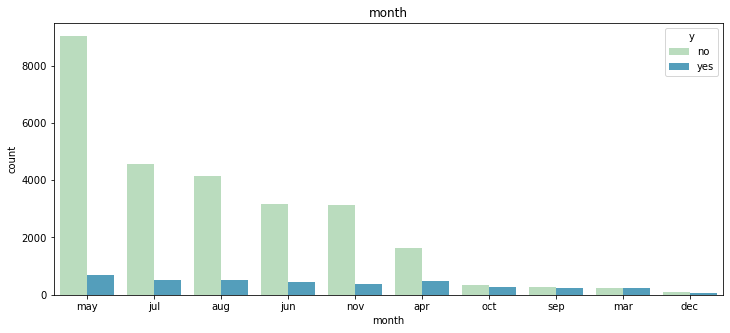

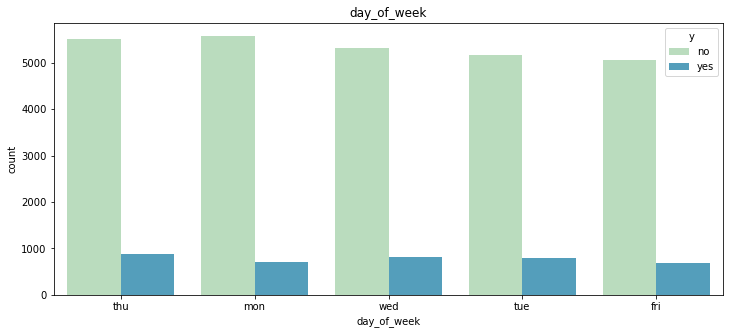

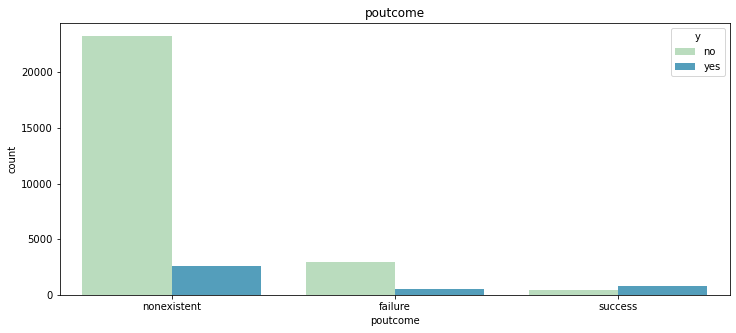

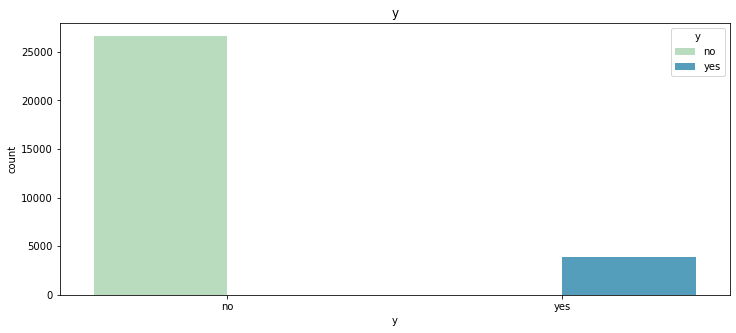

In [17]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue='y', palette='GnBu', order=df[col].value_counts().index)
    plt.title(col)
    plt.show()

# 3: Data Preprocessing

In [18]:
# Apply binary encoding for the 'y' column (output variable)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

"""
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')
"""

"\n# Convert target variable into numeric\ndf.y = df.y.map({'no':0, 'yes':1}).astype('uint8')\n"

In [19]:
le = LabelEncoder()
objects = ["job","marital","education","housing","loan","contact","month","day_of_week", "poutcome"]
for i in objects:  
    df[i] = le.fit_transform(df[i])

In [20]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,1,6,1,139,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# 4: Split Data into Training and Testing Sets

In [21]:
# Generate Train and Test Split
x = df.drop(['y'], axis=1)
y = df["y"]
#..........................................
columns = x.columns

scalar = StandardScaler()
x = scalar.fit_transform(x) 

x = pd.DataFrame(x, columns=columns)
#..........................................
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)  # all are df
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (21341, 19)
y_train shape =  (21341,)
x_test shape =  (9147, 19)
y_test shape =  (9147,)


# Model 1

# 5 : Build and Train the Neural Network Model

In [22]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
667/667 [==============================] - 4s 4ms/step - loss: 0.2820 - accuracy: 0.8818 - val_loss: 0.2191 - val_accuracy: 0.9001
Epoch 2/10
667/667 [==============================] - 3s 4ms/step - loss: 0.2342 - accuracy: 0.8945 - val_loss: 0.2134 - val_accuracy: 0.8999
Epoch 3/10
667/667 [==============================] - 3s 4ms/step - loss: 0.2263 - accuracy: 0.8981 - val_loss: 0.2125 - val_accuracy: 0.9015
Epoch 4/10
667/667 [==============================] - 3s 4ms/step - loss: 0.2233 - accuracy: 0.9001 - val_loss: 0.2104 - val_accuracy: 0.9012
Epoch 5/10
667/667 [==============================] - 3s 4ms/step - loss: 0.2192 - accuracy: 0.9010 - val_loss: 0.2096 - val_accuracy: 0.9029
Epoch 6/10
667/667 [==============================] - 3s 4ms/step - loss: 0.2172 - accuracy: 0.9019 - val_loss: 0.2084 - val_accuracy: 0.9010
Epoch 7/10
667/667 [==============================] - 3s 4ms/step - loss: 0.2149 - accuracy: 0.9008 - val_loss: 0.2075 - val_accuracy: 0.9023
Epoch 

# 6 : Evaluate the Model

In [23]:
preds = model.predict(x_test).reshape((-1,))

res = pd.DataFrame()
res["Actual"] = y_test.values
res["Predictian"] = preds
res

286/286 [==============================] - 1s 2ms/step


,Actual,Predictian
0,0,0.300567
1,0,0.202141
2,0,0.000028
3,0,0.000014
4,0,0.437657
...,...,...
9142,0,0.067496
9143,0,0.000253
9144,0,0.000410
9145,1,0.552582


In [24]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

286/286 [==============================] - 1s 3ms/step - loss: 0.2074 - accuracy: 0.9027
Test Accuracy: 90.27%


286/286 [==============================] - 1s 2ms/step


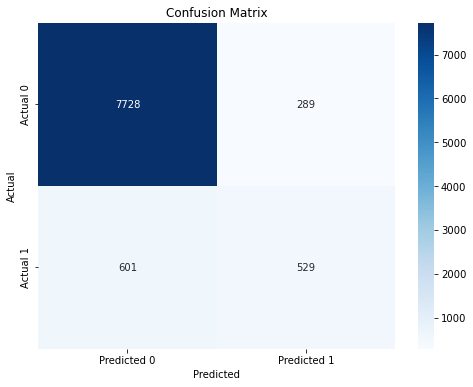

In [25]:
# Generate predictions using the trained model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model 2

# 5 : Build and Train the Neural Network Model

In [30]:
model2 = Sequential()

model2.add(layers.Dense(32, activation="sigmoid", input_shape=(x_train.shape[1],)))
model2.add(layers.Dense(16, activation="sigmoid"))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                640       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
# Train the model
model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
667/667 [==============================] - 3s 4ms/step - loss: 0.1154 - accuracy: 0.8721 - val_loss: 0.1068 - val_accuracy: 0.8765
Epoch 2/20
667/667 [==============================] - 2s 3ms/step - loss: 0.1094 - accuracy: 0.8721 - val_loss: 0.1059 - val_accuracy: 0.8765
Epoch 3/20
667/667 [==============================] - 2s 4ms/step - loss: 0.1088 - accuracy: 0.8721 - val_loss: 0.1054 - val_accuracy: 0.8765
Epoch 4/20
667/667 [==============================] - 2s 4ms/step - loss: 0.1084 - accuracy: 0.8721 - val_loss: 0.1050 - val_accuracy: 0.8765
Epoch 5/20
667/667 [==============================] - 2s 3ms/step - loss: 0.1079 - accuracy: 0.8721 - val_loss: 0.1045 - val_accuracy: 0.8765
Epoch 6/20
667/667 [==============================] - 2s 3ms/step - loss: 0.1075 - accuracy: 0.8721 - val_loss: 0.1040 - val_accuracy: 0.8765
Epoch 7/20
667/667 [==============================] - 2s 3ms/step - loss: 0.1069 - accuracy: 0.8721 - val_loss: 0.1035 - val_accuracy: 0.8765
Epoch 

# 6 : Evaluate the Model

In [40]:
preds = model2.predict(x_test).reshape((-1,))

res = pd.DataFrame()
res["Actual"] = y_test.values
res["Predictian"] = preds
res

286/286 [==============================] - 1s 2ms/step


,Actual,Predictian
0,0,0.217890
1,0,0.121698
2,0,0.111555
3,0,0.101141
4,0,0.241500
...,...,...
9142,0,0.188499
9143,0,0.117953
9144,0,0.089829
9145,1,0.268975


286/286 [==============================] - 1s 2ms/step


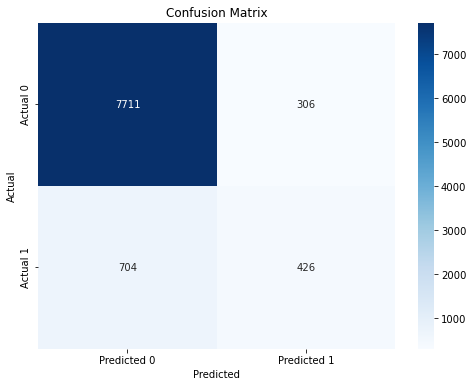

In [39]:
# Generate predictions using the trained model
y_pred = model2.predict(x_test)
y_pred = (y_pred > 0.25)  

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()